In [1]:
#Import Necessory libraries
import pandas as pd
import numpy as np

#For Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#import plotly
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets load the dataset
data=pd.read_csv("https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv")
data.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
270,271,0,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,STON/O 2. 3101280,7.9250,NaN,S
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,NaN,S
232,233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,237442,13.5000,NaN,S
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,13213,35.5000,A26,C
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,S
702,703,0,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,NaN,C
548,549,0,3,"Goldsmith, Mr. Frank John",male,33.0,1,1,363291,20.5250,NaN,S
722,723,0,2,"Gillespie, Mr. William Henry",male,34.0,0,0,12233,13.0000,NaN,S


In [3]:
#Lets check the shape of the dataset
data.shape

(891, 12)

So, Here we can see that we have 891 rows and 12 Columns..

In [4]:
#Lets check for isnull
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

So, Here we can see that we have got null values in 2 columns. "Cabin" and "Age". So , Here i am deciding to Delete "Cabin" Column and fill nan in Age Columns .

In [5]:
#Lets check the duplicated values
data.duplicated().sum()

0

So, Here we are can find we dont have any duplicates values . So we are good to proceed.

In [7]:
#Lets check the data type of the dataset
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

So, Here we can see that 5 Integer , 5 Object and 2 Float Columns . 

In [8]:
#Lets check the info of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
#Lets check the statistical Summary of the dataset.
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# OBSERVATION

    - We Dont have any null values
    - All the data almost normally distributed except Fare .
    - Some of the columns are Numerical but its representing the categorical columns/
    - Fare containing Outliers

In [11]:
#Lets describe the dataset include ="O"
data.describe(include="O")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


# Observation
    - We dont have any null values 
    - We have unique values in "Sex" and "Embarked" 
    - "Cabin" and "Name" i am going to delete.


In [15]:
#Lets delete unnecessory columns
data.drop(columns=['Name',"Cabin"],inplace=True)

In [23]:
#Lets check the data again
data.tail(14)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
877,878,0,3,male,19.0,0,0,349212,7.8958,S
878,879,0,3,male,NaN,0,0,349217,7.8958,S
879,880,1,1,female,56.0,0,1,11767,83.1583,C
880,881,1,2,female,25.0,0,1,230433,26.0000,S
881,882,0,3,male,33.0,0,0,349257,7.8958,S
882,883,0,3,female,22.0,0,0,7552,10.5167,S
883,884,0,2,male,28.0,0,0,C.A./SOTON 34068,10.5000,S
884,885,0,3,male,25.0,0,0,SOTON/OQ 392076,7.0500,S
885,886,0,3,female,39.0,0,5,382652,29.1250,Q
886,887,0,2,male,27.0,0,0,211536,13.0000,S


So, Here we deleted the unnecessory columns.

In [25]:
#Lets check the shape of the dataset again
data.shape

(891, 10)

Lets moveforward to EDA Part..

# EDA -> Exploratory Data Analysis



In [26]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [27]:
#Lets delete Passenger Columns also
data.drop(columns=['PassengerId'],inplace=True)

In [28]:
#Lets check the shape of the dataset
data.shape

(891, 9)

In [30]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

# Univariate

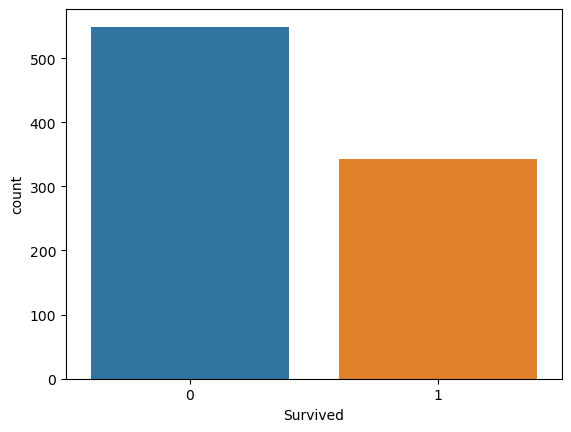

0    549
1    342
Name: Survived, dtype: int64

In [31]:
#Lets plot Survived 
sns.countplot(x='Survived',data=data)
plt.show()
data['Survived'].value_counts()

So, Here we consider is  a imbalanced dataset.

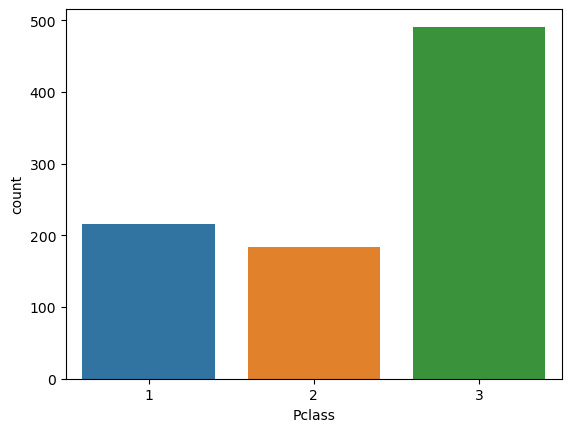

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [32]:
#Lets plot Pclass
sns.countplot(x='Pclass',data=data)
plt.show()
data['Pclass'].value_counts()

Here , We can see that more people are travel in Pclass 3 then 1 and then 2 

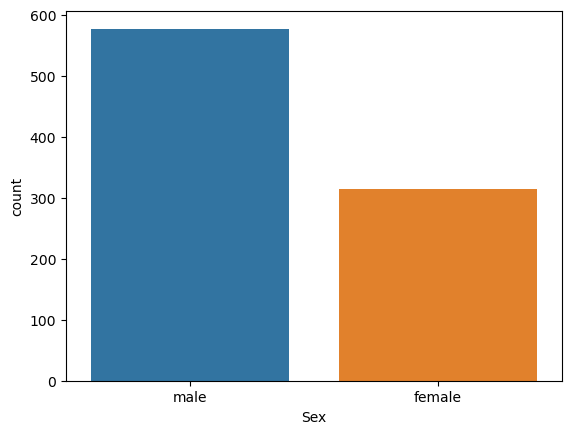

male      577
female    314
Name: Sex, dtype: int64

In [33]:
#Lets plot Sex
sns.countplot(x='Sex',data=data)
plt.show()
data['Sex'].value_counts()

Here , We can see that Maximum are Male are Travelling then Female .

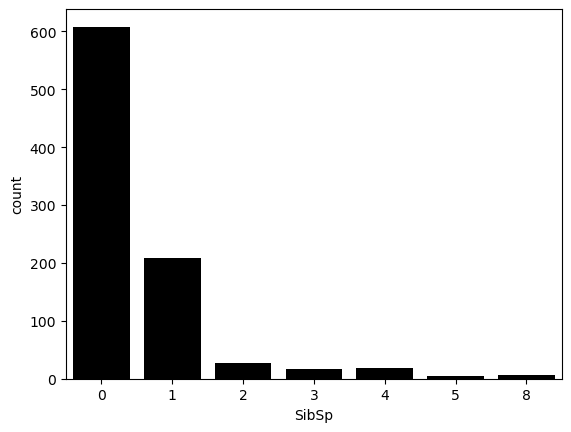

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [35]:
#Lets plot SibSp
sns.countplot(x='SibSp',data=data,color='black')
plt.show()
data['SibSp'].value_counts()

So, Here we can see that most of the people travelling alone and very less people have 8 and 5 Siblings..

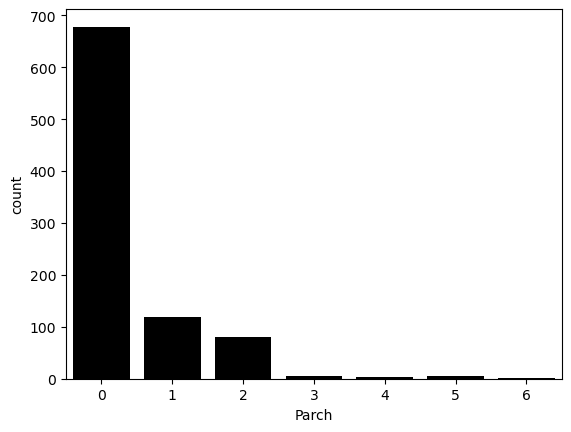

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [36]:
#Lets plot Parch
sns.countplot(x='Parch',data=data,color='black')
plt.show()
data['Parch'].value_counts()

So, Here we can see that maximum people are travelling without parents. and then follow by 1 then 2 then 5 then 4 , 3 and then 6 . 

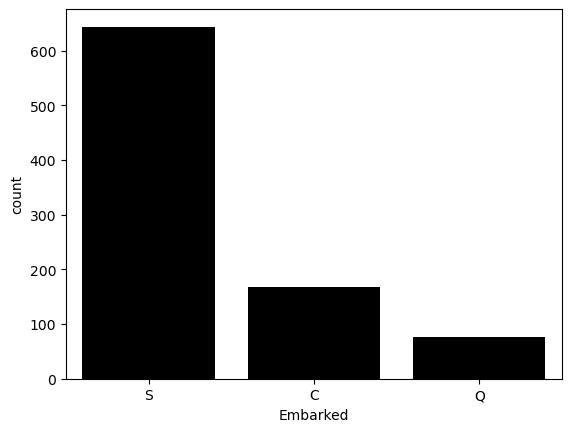

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [38]:
#Lets plot Embarked'
sns.countplot(x='Embarked',data=data,color='black')
plt.show()
data['Embarked'].value_counts()

So , Here we can see that maximum people get into the Ship from "S" then "C" and the "Q"

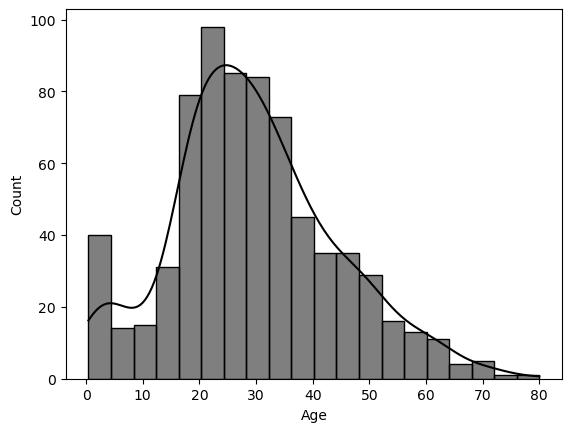

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [43]:
#Lets plot Age
sns.histplot(x='Age',data=data,color='black',kde=True)
plt.show()
data['Age'].value_counts()

So, Here we can see that Maximum people age lie on 20 -35 and this data is almost normalyy distributed.

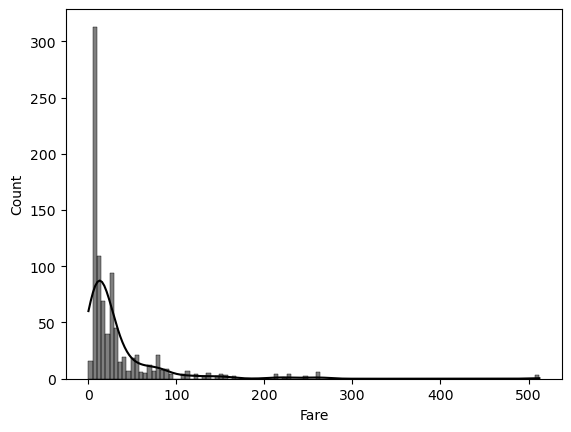

In [46]:
#Lets plot Fare
sns.histplot(x="Fare",data=data,color='black',kde=True)
plt.show()

So, Here we can see that our Fare Columns is Right Skewed .  and May be it contain outliers also..

# Bivaraite Analysis

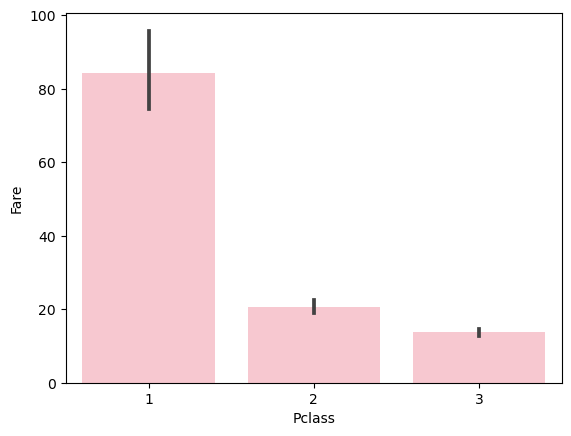

In [51]:
#Lets plot Fare with Pclass
sns.barplot(y="Fare",x='Pclass',data=data,color='pink')
plt.show()

Here we can see that , Costly ticket are from 1st Class then 2nd and the 3rd..

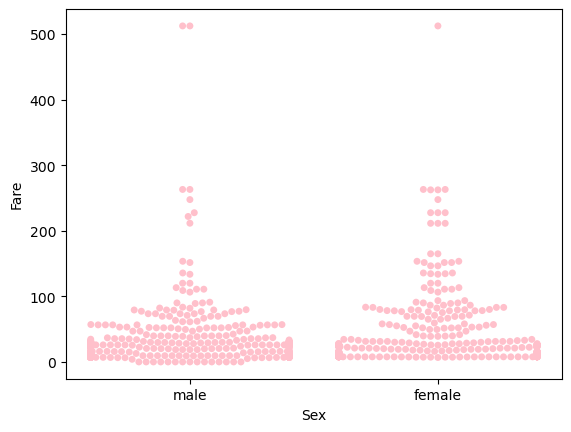

In [56]:
#Lets plot Fare with Sex
sns.swarmplot(y="Fare",x='Sex',data=data,color='pink')
plt.show()

So, Here we can see that Female are less then mens travelling in Ship

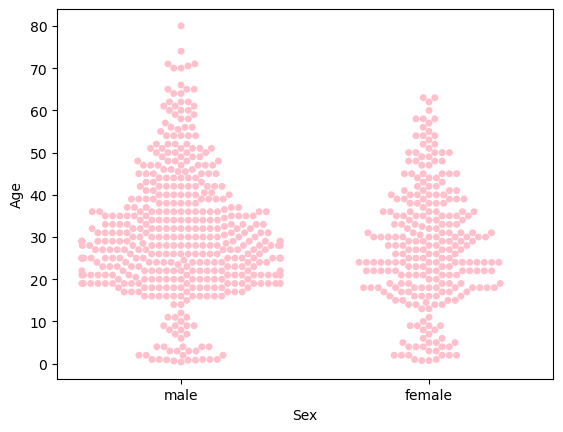

In [62]:
#Lets plot Age with Sex
sns.swarmplot(y="Age",x='Sex',data=data,color='pink')
plt.show()

Maximum Girls age lie between 15 to 50 and for mewn 20 - 68 . and mens also more then women.

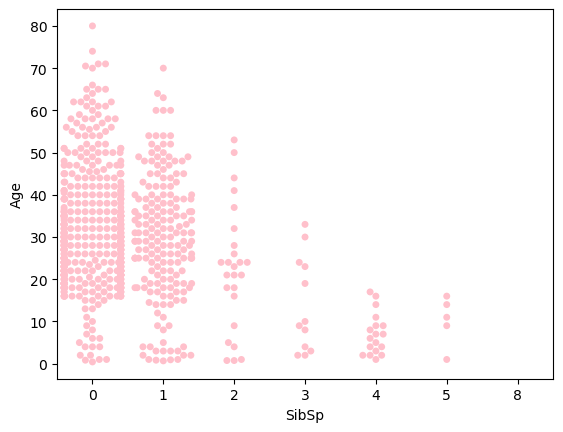

In [64]:
#Lets plot Age with Sibsip
sns.swarmplot(y="Age",x='SibSp',data=data,color='pink')
plt.show()

Maximum People travelling without any Siblings and then travelling with 1 Siblings and then 2 .

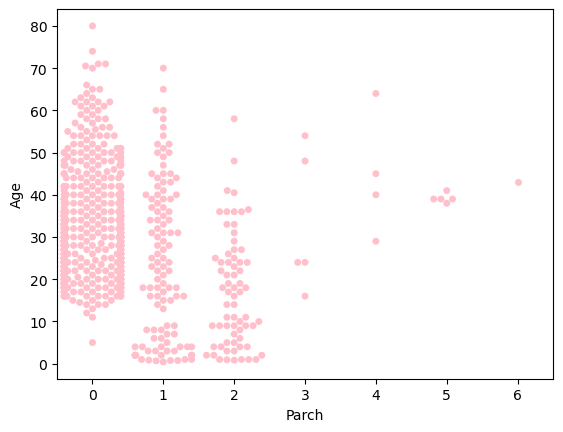

In [66]:
#Lets plot Age with Parch
sns.swarmplot(y="Age",x='Parch',data=data,color='pink')
plt.show()

Maximum People travelling withour parents . 

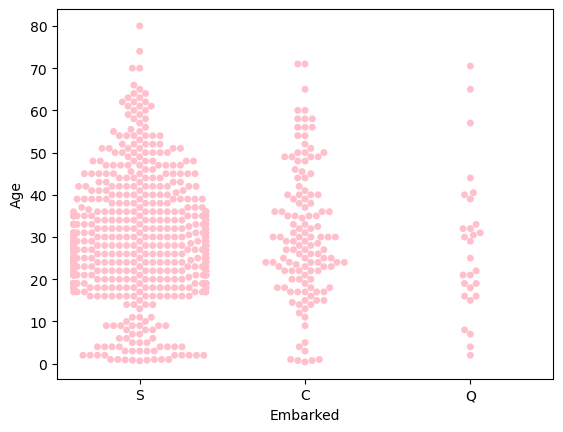

In [68]:
#Lets plot Age with Embarker
sns.swarmplot(y="Age",x='Embarked',data=data,color='pink')
plt.show()

Most of the people Embarked from "S" and less people from "C"  and "Q ".

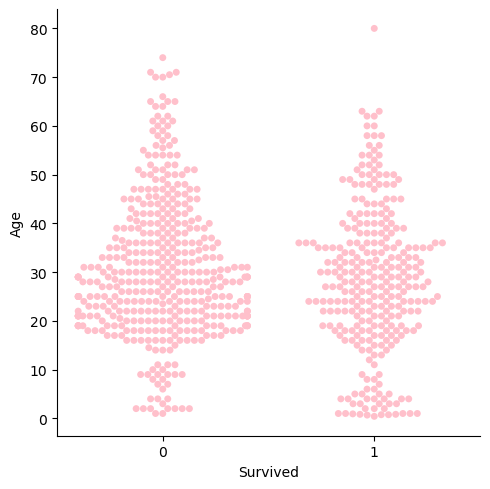

In [73]:
#Lets plot Age with Survived
sns.catplot(y="Age",x='Survived',data=data,color='pink',kind='swarm')
plt.show()

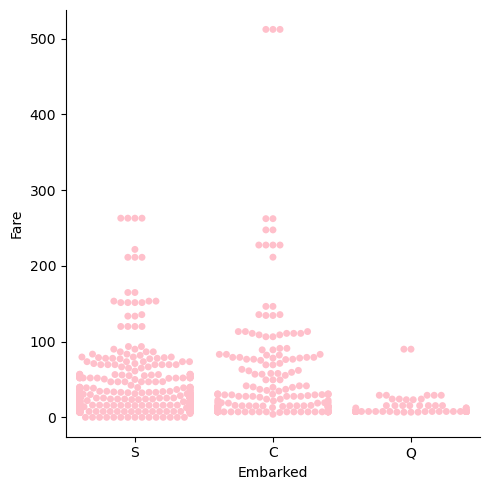

In [75]:
#Lets plot Fare with Embarked
sns.catplot(y="Fare",x='Embarked',data=data,color='pink',kind='swarm')
plt.show()

So, here we can see that forom S and C fare are equal in amount.

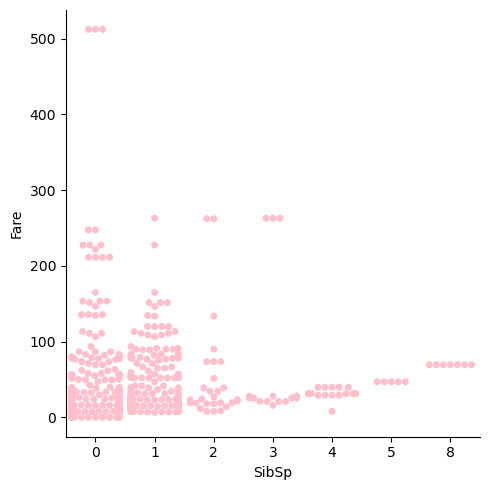

In [77]:
#Lets plot Fare with Embarked
sns.catplot(y="Fare",x='SibSp',data=data,color='pink',kind='swarm')
plt.show()

Fare is same for all people . and 0 and 1 sibsip have pai equal in  amounts.

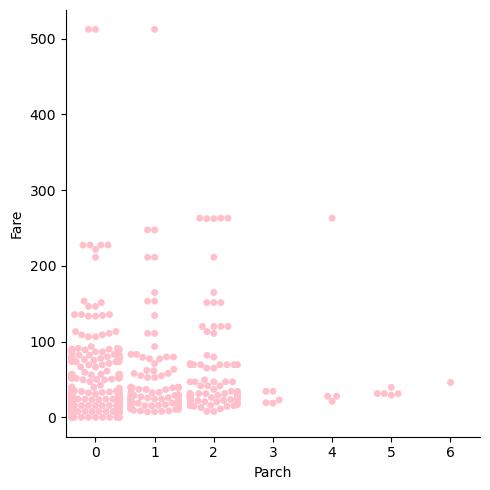

In [81]:
#Lets plot Fare with Parch
sns.catplot(y="Fare",x="Parch",data=data,color='pink',kind='swarm')
plt.show()

# Multivariate Analysis.

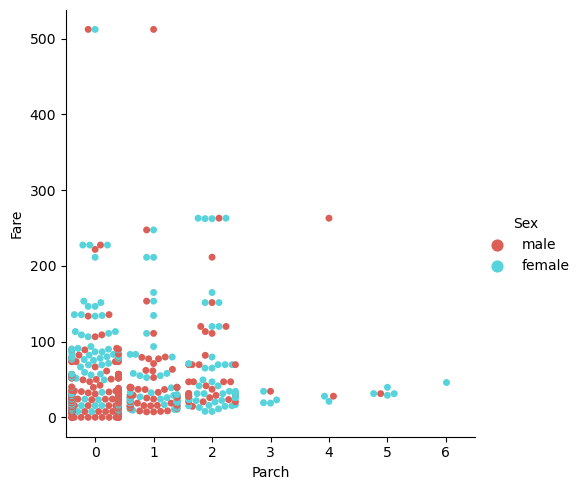

In [91]:
#Lets plot Fare with Parch and Sex
sns.catplot(y="Fare",x="Parch",hue='Sex',data=data,palette='hls',kind='swarm')
plt.show()

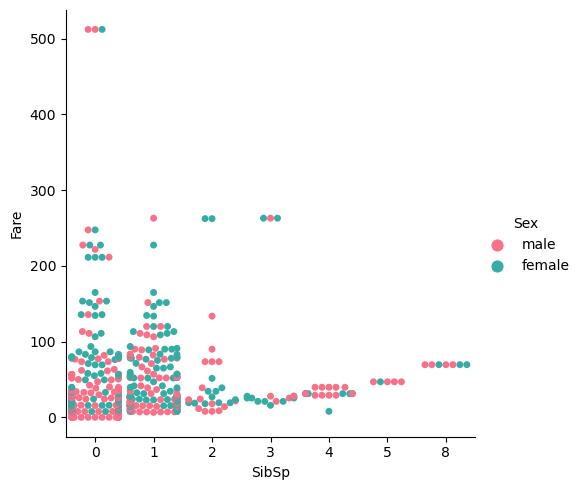

In [90]:
#Lets plot Fare with SibSp and Sex
sns.catplot(y="Fare",x="SibSp",hue='Sex',data=data,palette='husl',kind='swarm')
plt.show()

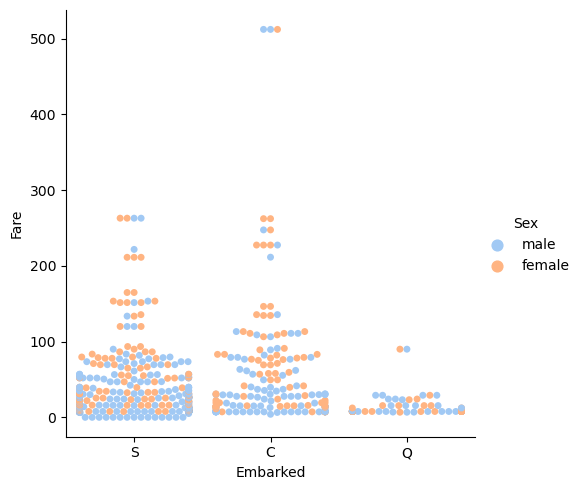

In [98]:
#Lets plot Fare with Embarked and Sex
sns.catplot(y="Fare",x="Embarked",hue='Sex',data=data,palette='pastel',kind='swarm')
plt.show()

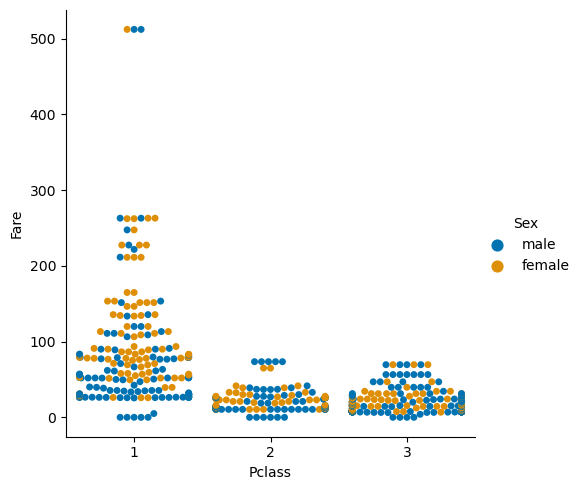

In [101]:
#Lets plot Fare with Pclass and Sex
sns.catplot(y="Fare",x="Pclass",hue='Sex',data=data,palette='colorblind',kind='swarm')
plt.show()

In [102]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

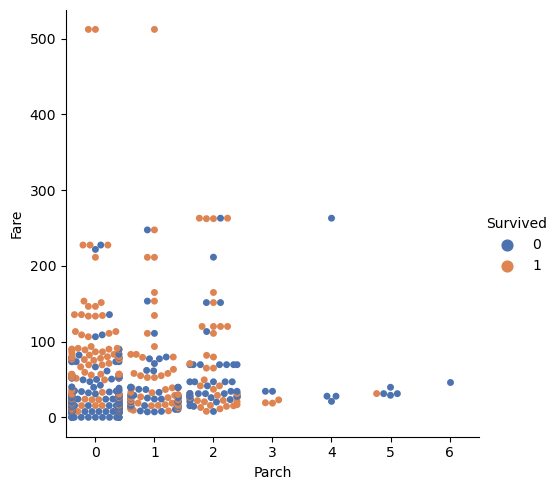

In [104]:
#Lets plot Fare with Embarked and Survived
sns.catplot(y="Fare",x="Parch",hue='Survived',data=data,palette='deep',kind='swarm')
plt.show()

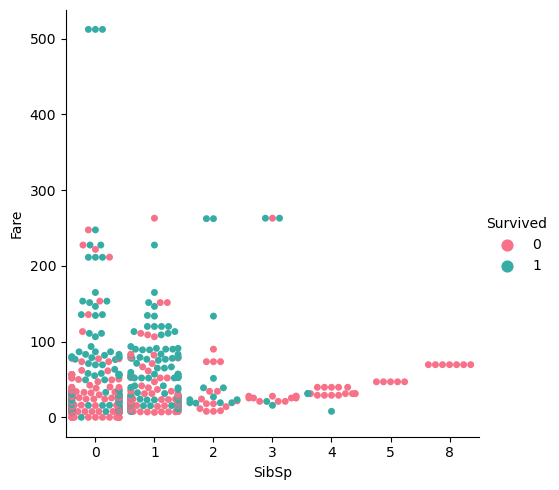

In [105]:
#Lets plot Fare with SibSp and Survived
sns.catplot(y="Fare",x="SibSp",hue="Survived",data=data,palette='husl',kind='swarm')
plt.show()

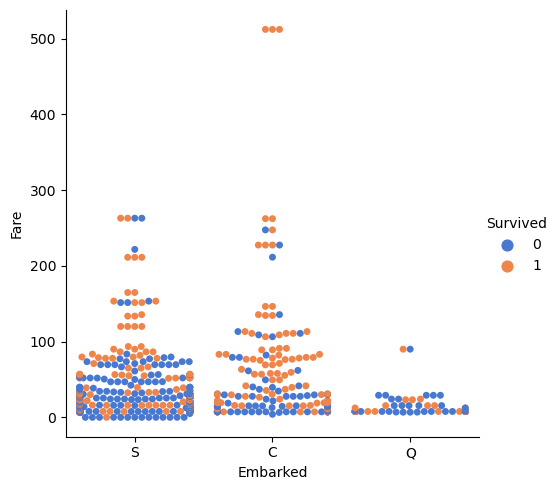

In [114]:
#Lets plot Fare with Embarked and Survived
sns.catplot(y="Fare",x="Embarked",hue="Survived",data=data,palette='muted',kind='swarm')
plt.show()

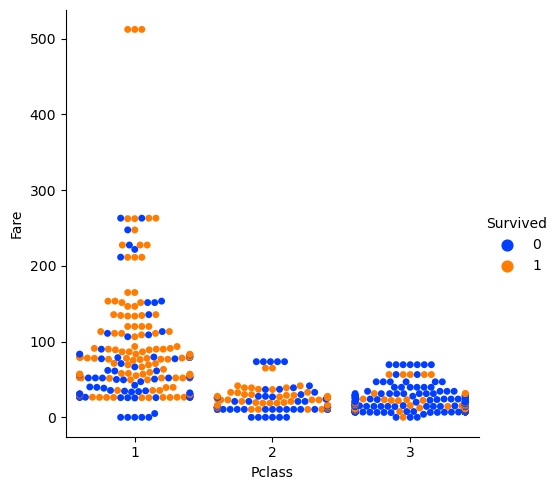

In [111]:
#Lets plot Fare with Pclass and Survived
sns.catplot(y="Fare",x="Pclass",hue="Survived",data=data,palette='bright',kind='swarm')
plt.show()

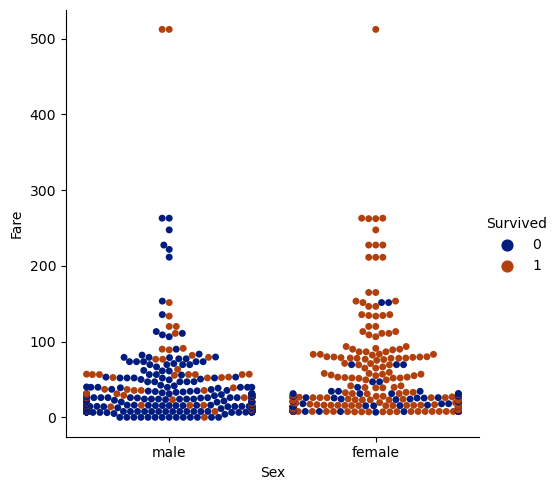

In [116]:
#Lets plot Fare with SEX and Survived
sns.catplot(y="Fare",x="Sex",hue="Survived",data=data,palette='dark',kind='swarm')
plt.show()

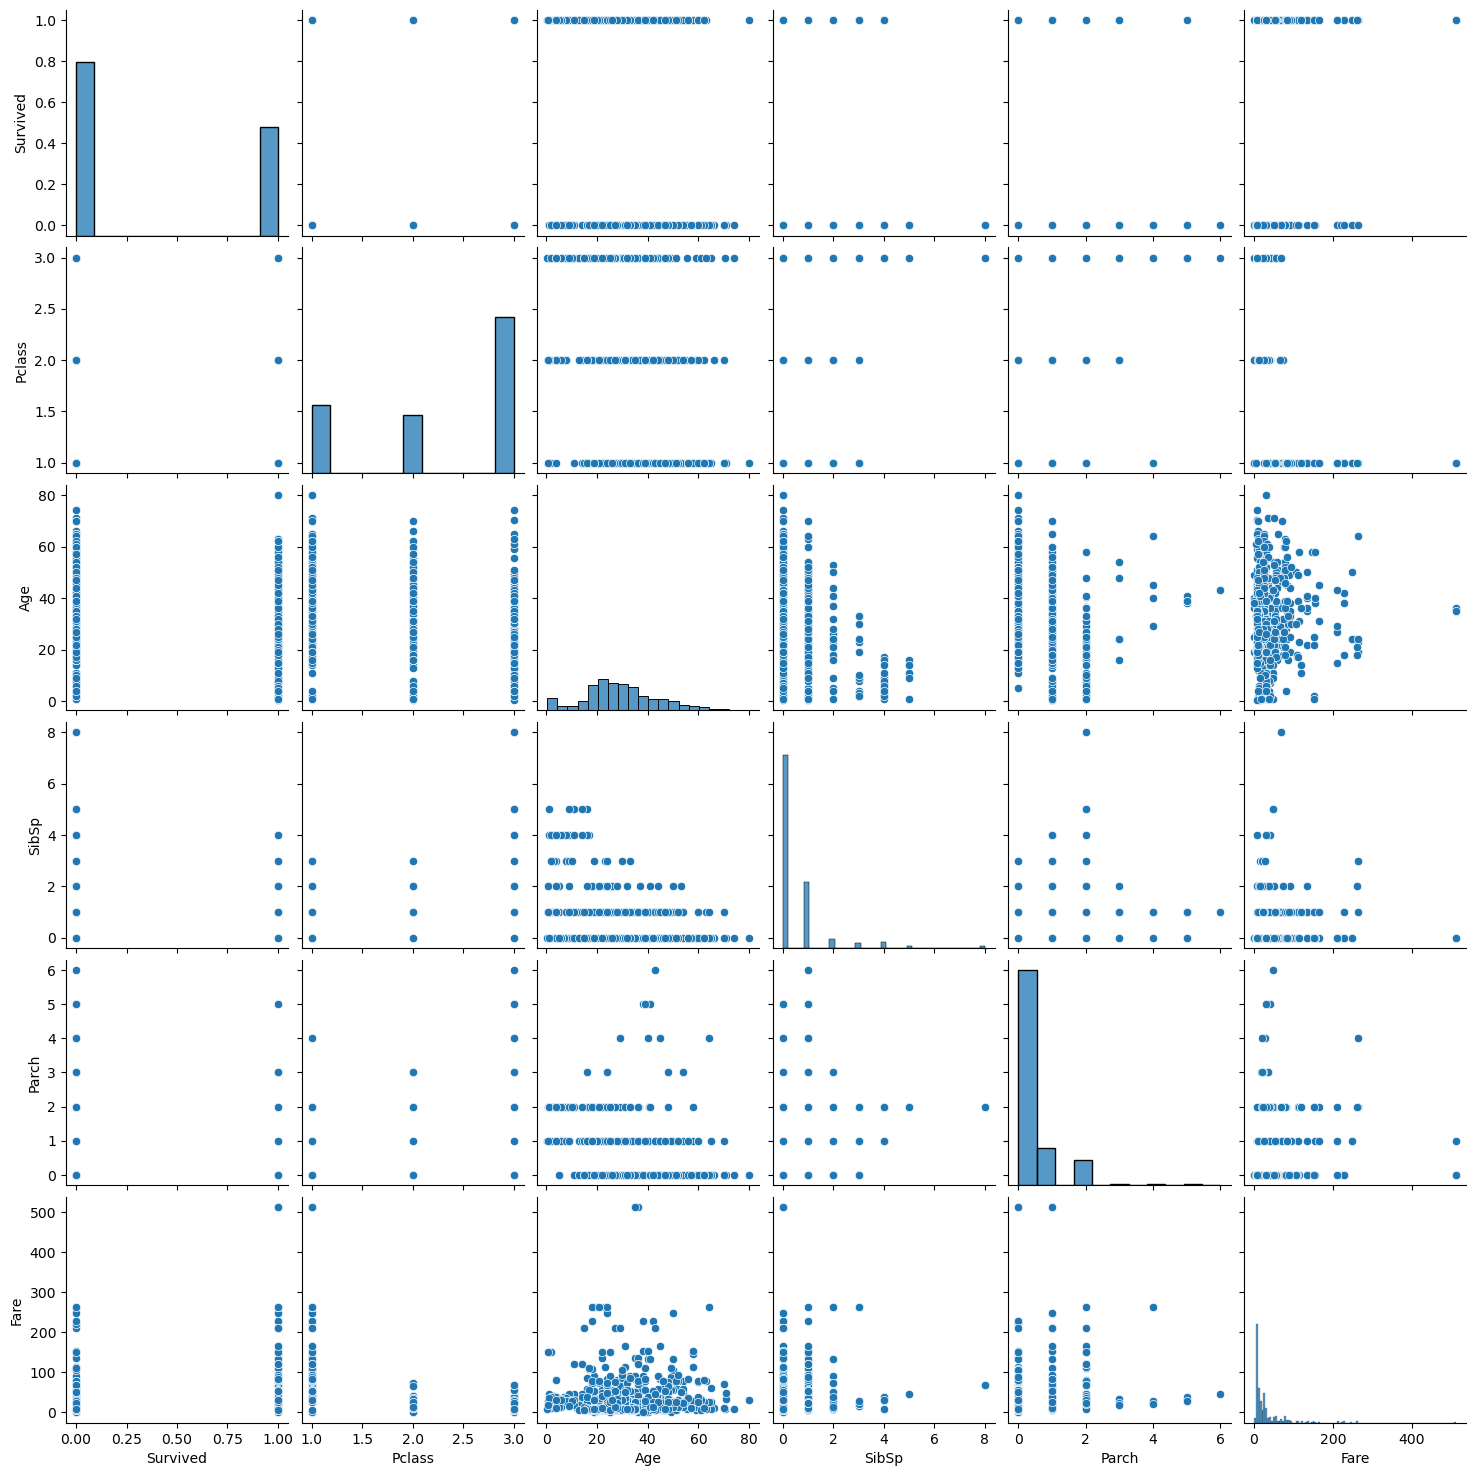

In [120]:
#Lets plot Pairplot
sns.pairplot(data,palette='colorblind')
plt.show()

In [121]:
#Select all numerical columns for ploting Distplot and Box plot
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
newdf

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


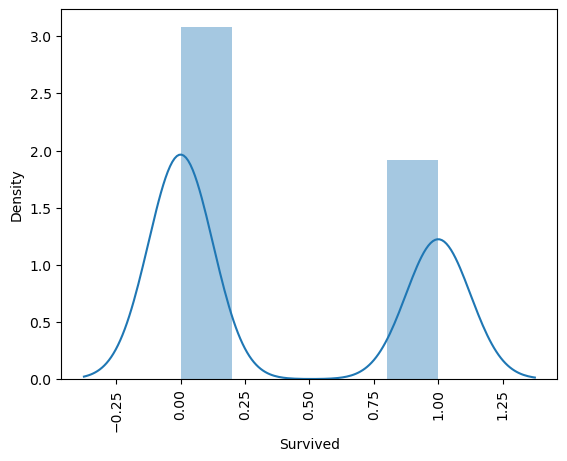

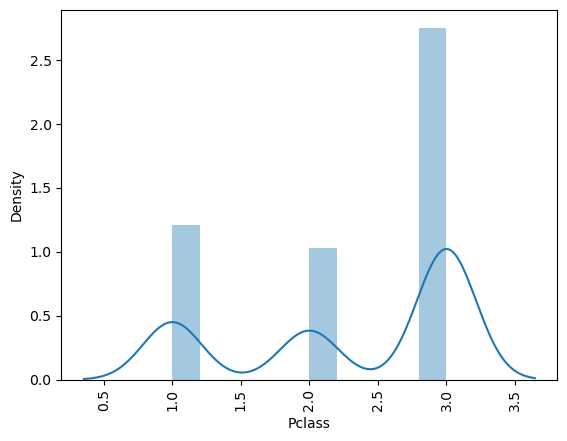

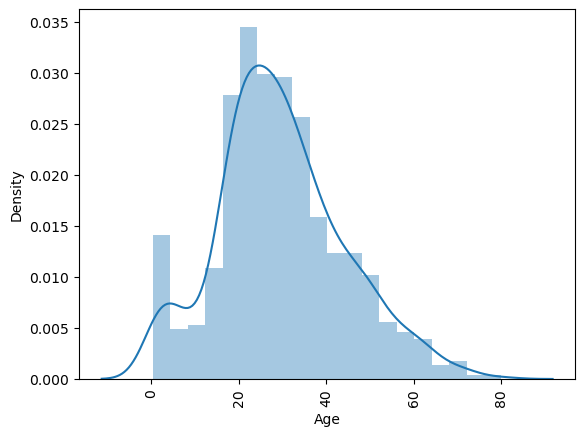

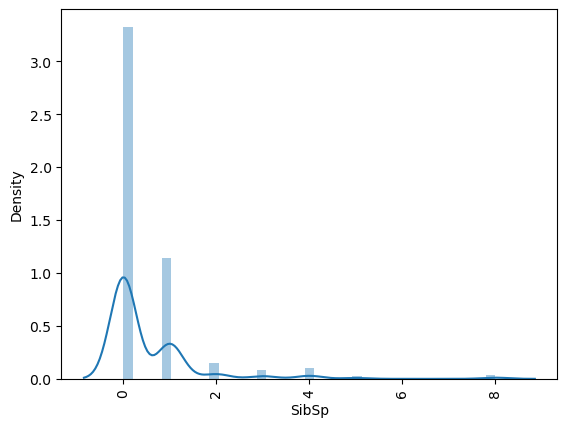

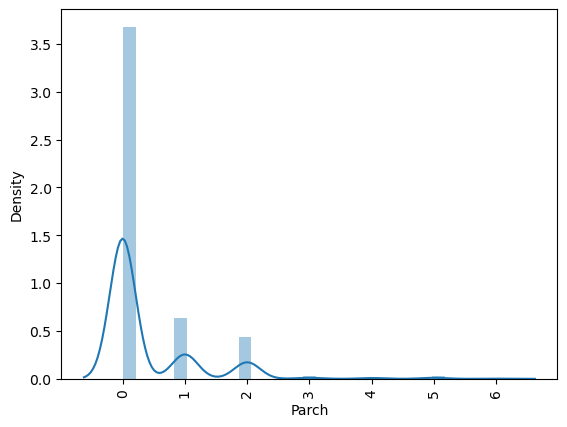

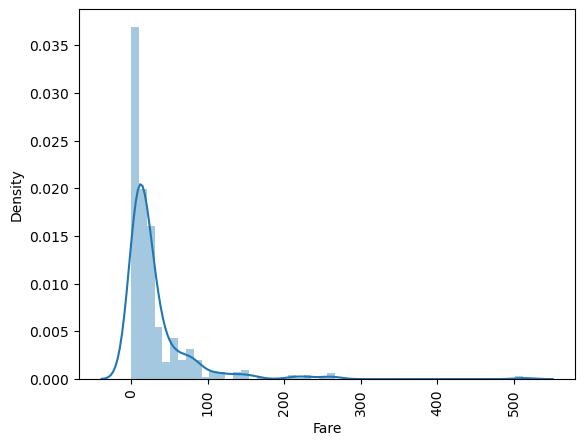

In [122]:
#Lets plot Distplot
for i in newdf:
    plt.figure()
    sns.distplot(newdf[i])
    
    plt.xticks(rotation=90)
    plt.show()

# Observation

    Sibsp-> We consider as Normal Distribution Because at the time of titanic 8 Brother and Sister is a Common things.
    Parch-> Number of Parents/Children Aboard Consider as a Normally Distribution
    Fare -> Column is a Not a normally Distributed .We have to Treat them..
    
and , Left columns are normally distributed , Because its a Categorical Column.

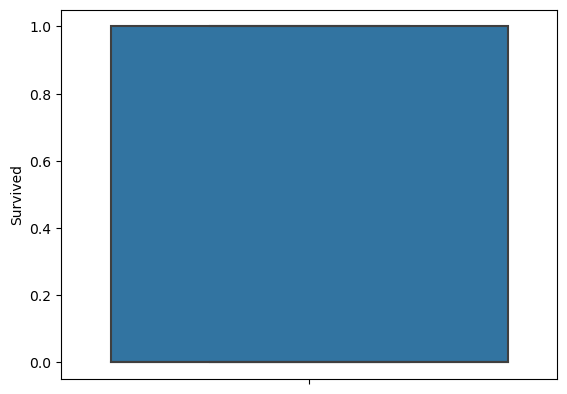

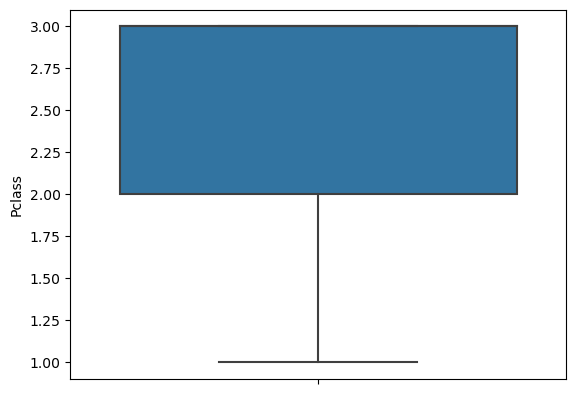

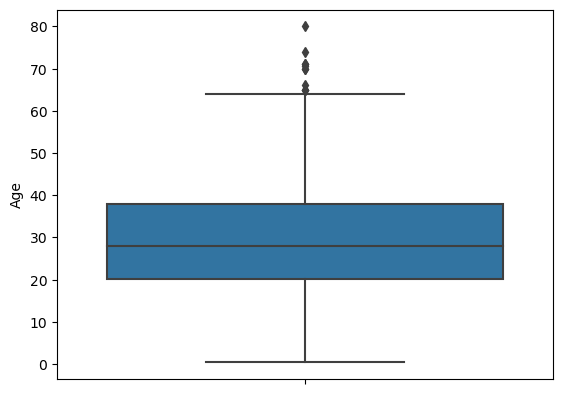

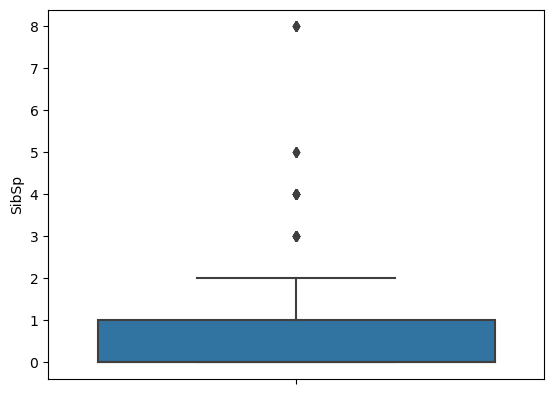

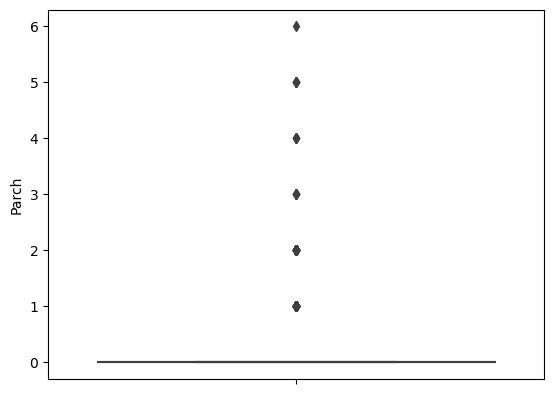

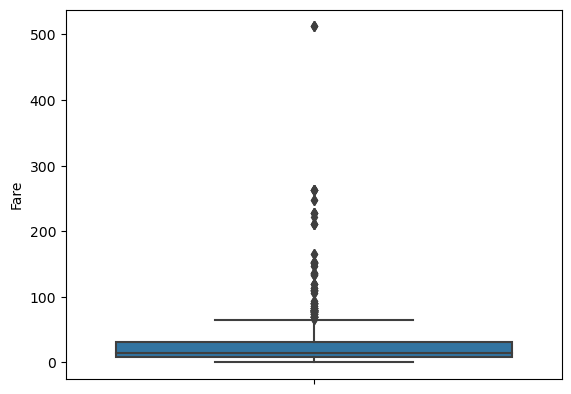

In [123]:
#Lets plot Boxplot
for i in newdf:
    plt.figure()
    sns.boxplot(y=newdf[i])
    
    plt.xticks(rotation=90)
    plt.show()

# Observation
    - Age Contain Outlier but i am not going to consider as a outlier . Because 80 Year is Maximum number. and 80 Peole also travel .
    - Sibsp Number of Siblings/Spouses Aboard are containing outliers. we have to treat them .. but not right now
    - Fare are containing outliers. we have to treat them .. but not right now .
    

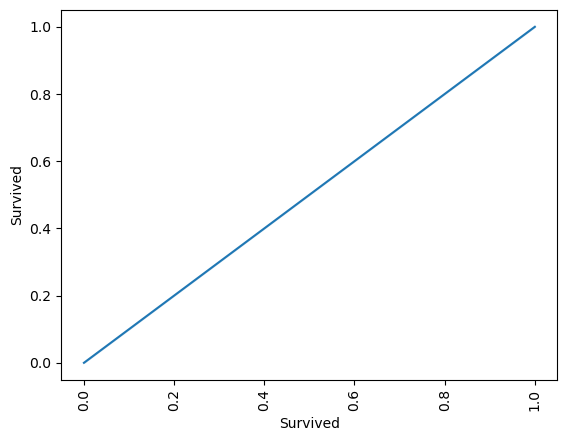

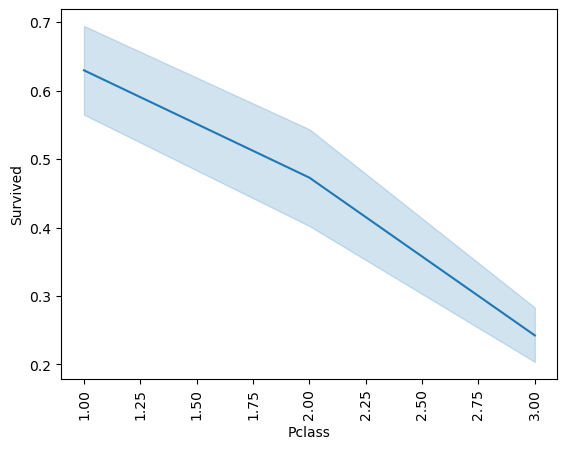

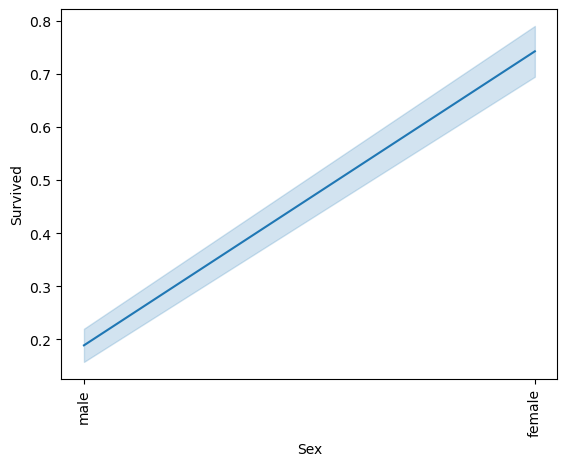

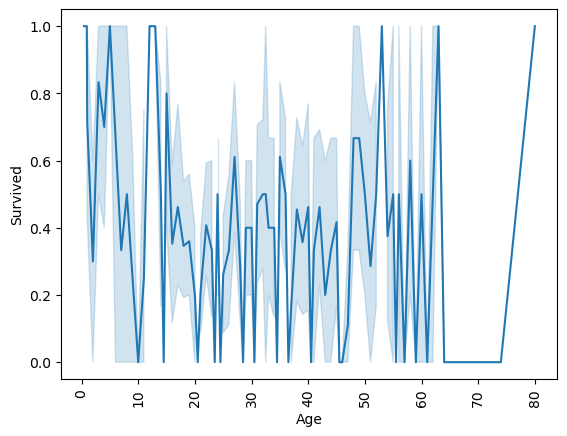

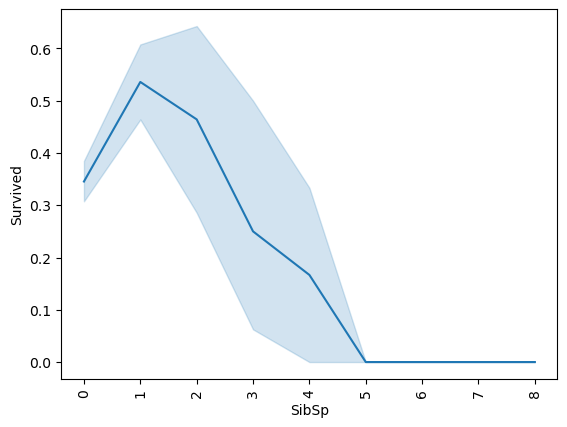

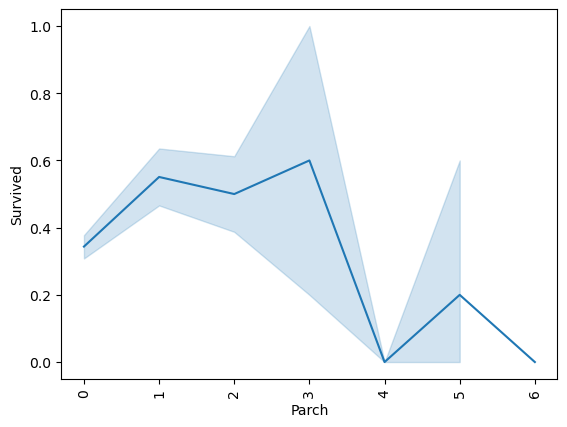

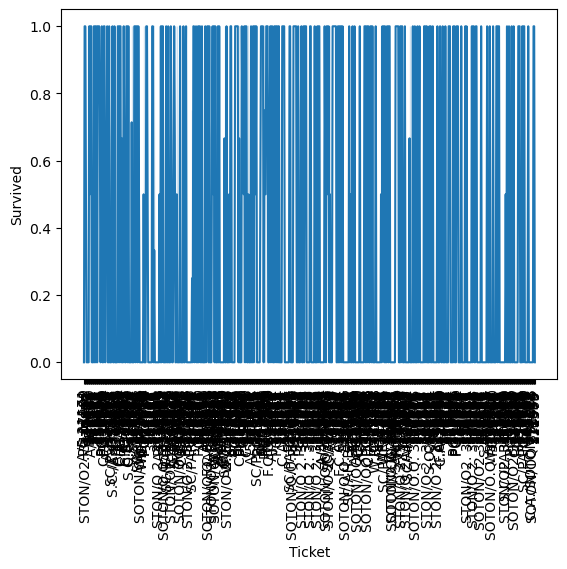

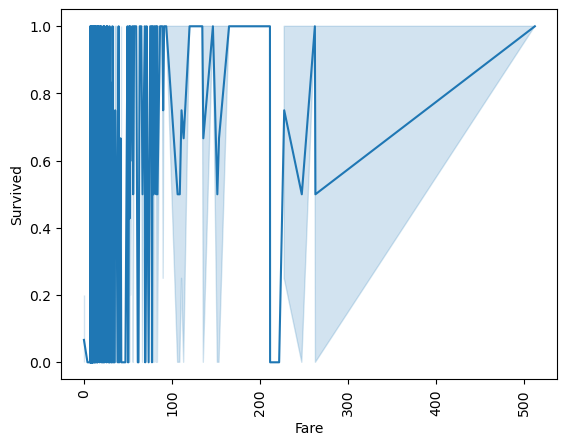

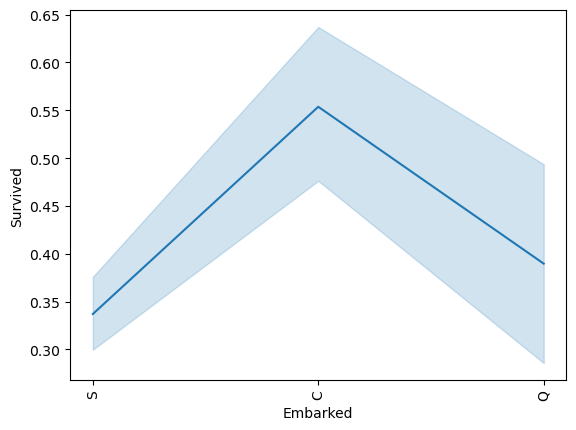

In [131]:
#Lets plot Relplot
for i in data:
    plt.figure()
    sns.lineplot(x=data[i],y='Survived',data=data)
    
    plt.xticks(rotation=90)
    plt.show()

Here our Visualizing is over . Now lets proceed to Preprocessing Steps.

# Data Preprocessing

In [156]:
#Lets fill the null values
data["Age"].fillna( method ='ffill', inplace = True)
data["Embarked"].fillna( method ='bfill', inplace = True)
data.isna().sum()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [157]:
#Lets Check for Outliers
#Select all numerical columns for ploting Distplot and Box plot
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = data.select_dtypes(include=numerics)
newdf

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,19.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [160]:
#Lets Remove Outliers
import numpy as np
from scipy.stats import zscore
features = data[['Age','SibSp']]
# Using zscore to remove outliers
z=np.abs(zscore(features))
# Creating new dataframe
new_df = data[(z<3).all(axis=1)] 
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,female,35.0,1,0,113803,53.1000,S
4,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S
887,1,1,female,19.0,0,0,112053,30.0000,S
888,0,3,female,19.0,1,2,W./C. 6607,23.4500,S
889,1,1,male,26.0,0,0,111369,30.0000,C


In [161]:
# Shape of original dataset
data.shape

(891, 9)

In [162]:
#After Removing Outliers
new_df.shape

(859, 9)

In [163]:
# Checking the the data loss
data_loss = (891-859)/891*100
data_loss

3.5914702581369253

Here we loss 3.59 % Data

In [164]:
# IQR (Inter Quantile Range) method
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df1=data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [165]:
df1.shape

(837, 9)

In [167]:
# Checking the the data loss
data_loss = (891-837)/891*100
data_loss

6.0606060606060606

Here we loss 6.06 % .

So, in IQR Method we can see that we lost out 6.06 % data . lets move foreward with Z score if we dont get better result with Z Score Method then we choose IQR Metho

In [168]:
#Encoding the categorical columns using Label Encoding
# checking for categorical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Sex', 'Ticket', 'Embarked']


In [169]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [170]:
new_df[categorical_col]

,Sex,Ticket,Embarked
0,1,520,2
1,0,592,0
2,0,665,2
3,0,49,2
4,1,469,2
...,...,...,...
886,1,101,2
887,0,14,2
888,0,671,2
889,1,8,0


In [171]:
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,520,7.2500,2
1,1,1,0,38.0,1,0,592,71.2833,0
2,1,3,0,26.0,0,0,665,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,469,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2
887,1,1,0,19.0,0,0,14,30.0000,2
888,0,3,0,19.0,1,2,671,23.4500,2
889,1,1,1,26.0,0,0,8,30.0000,0


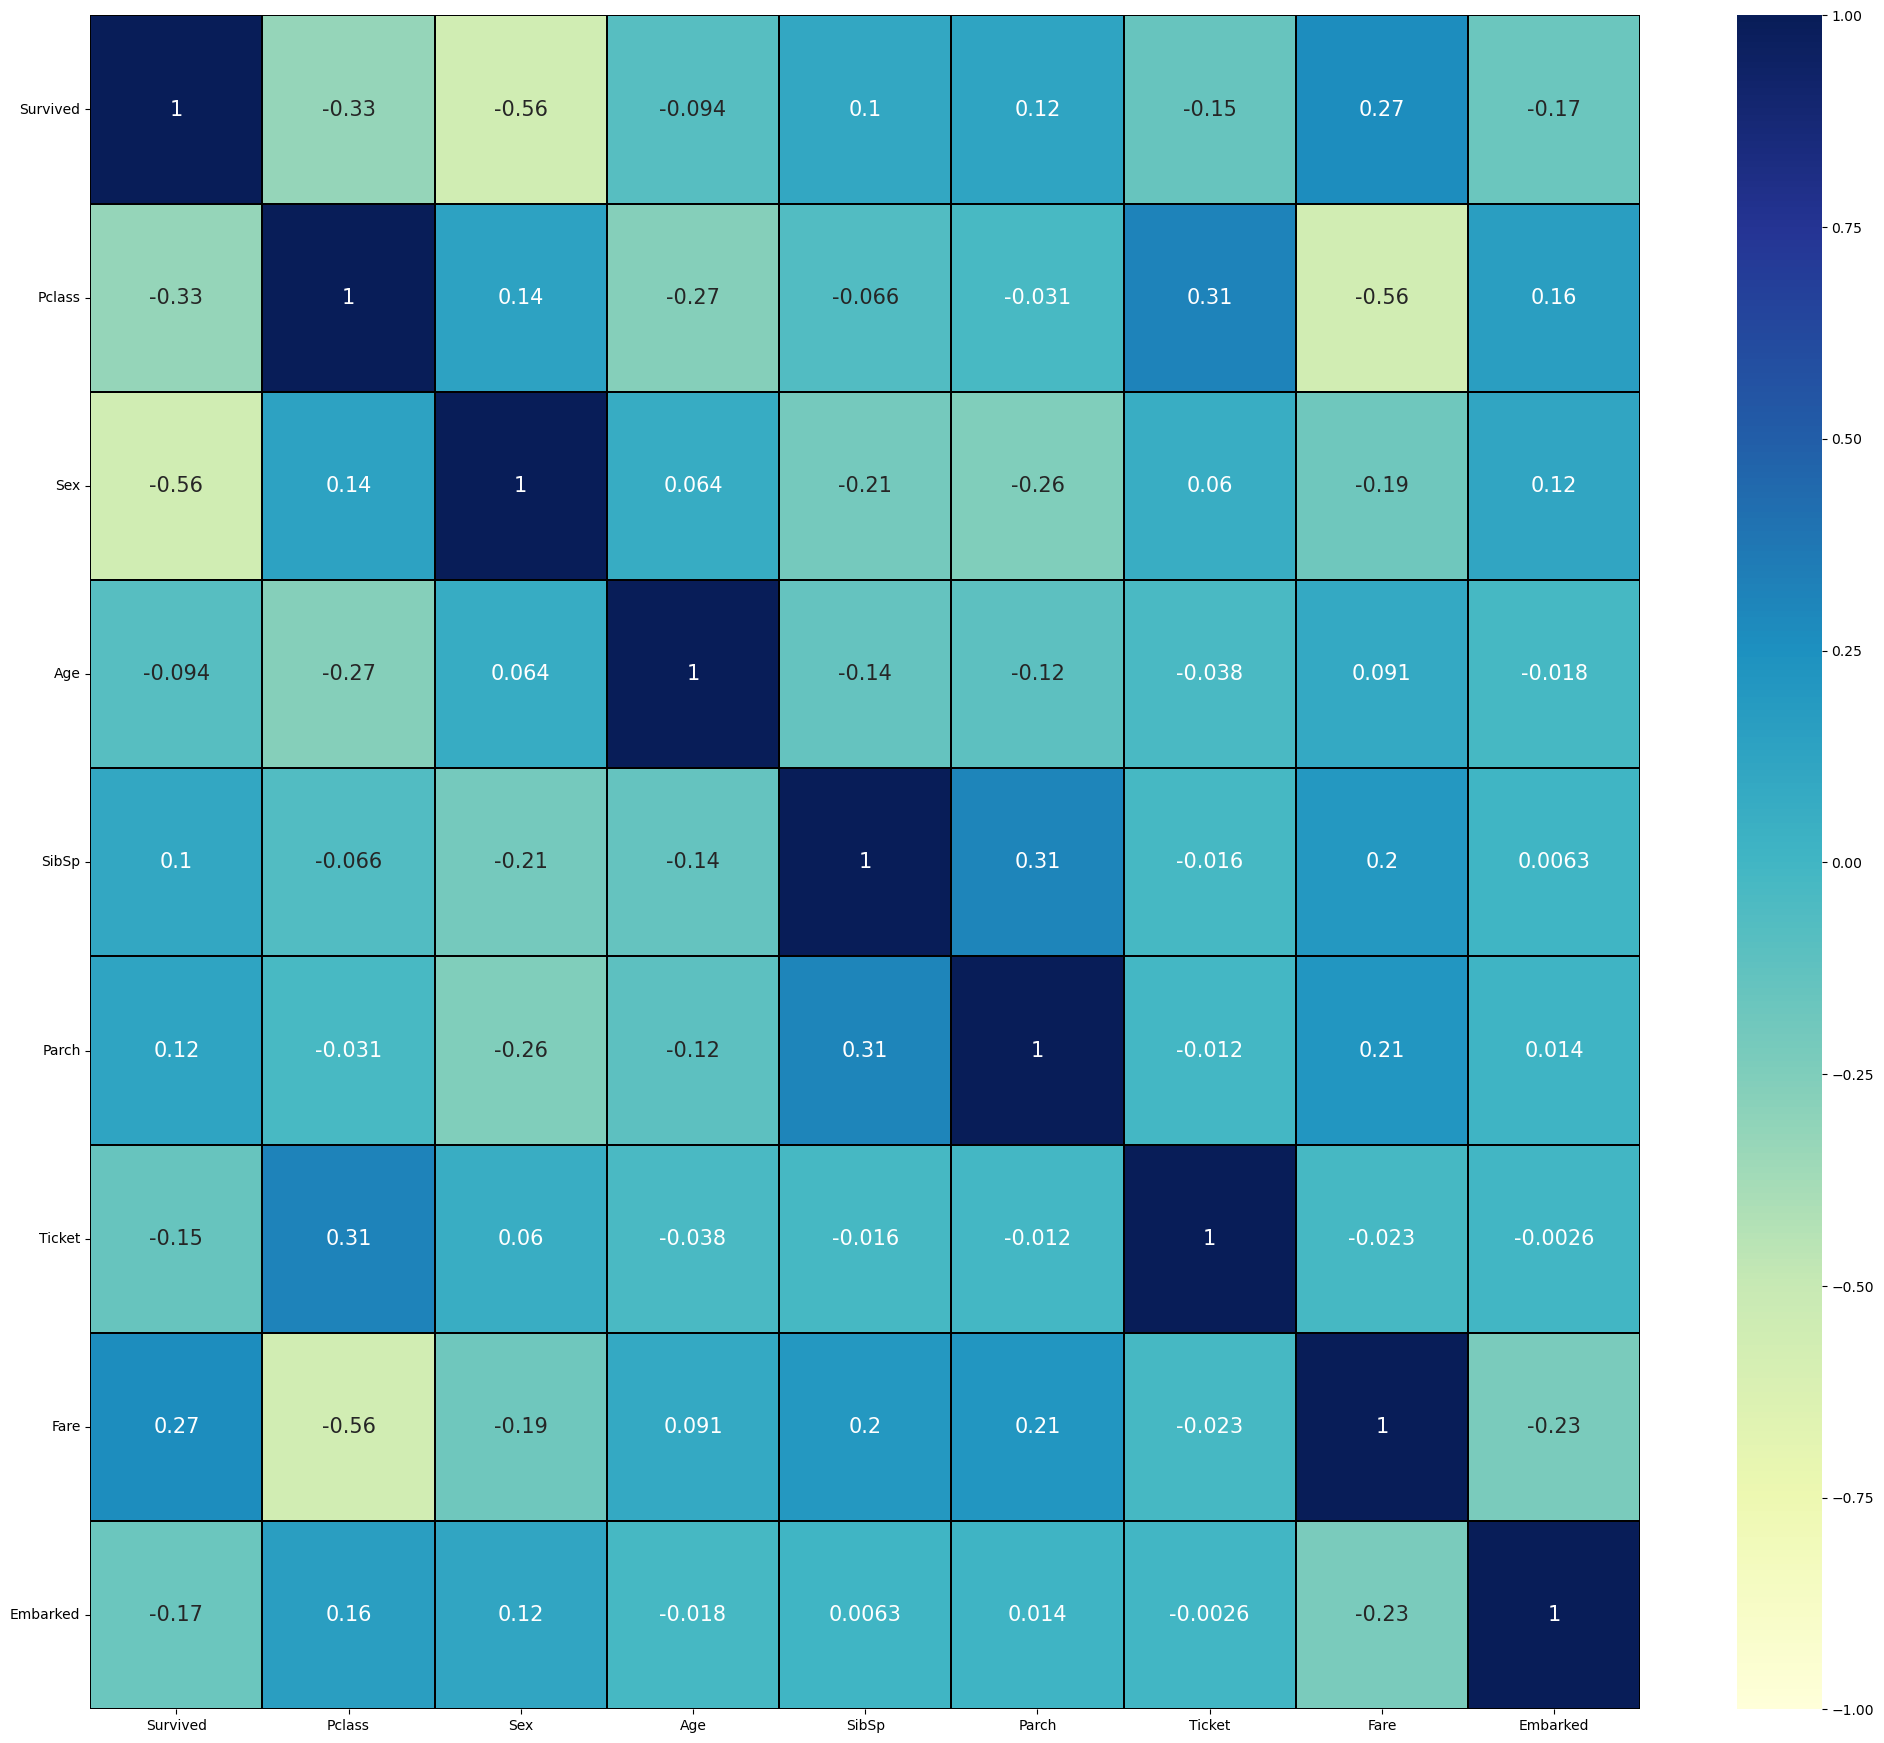

In [172]:
#Correlation between the target variable and features using HEAT map
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True, linecolor="black",annot_kws={'size':15},cmap="YlGnBu")
plt.yticks(rotation=0);

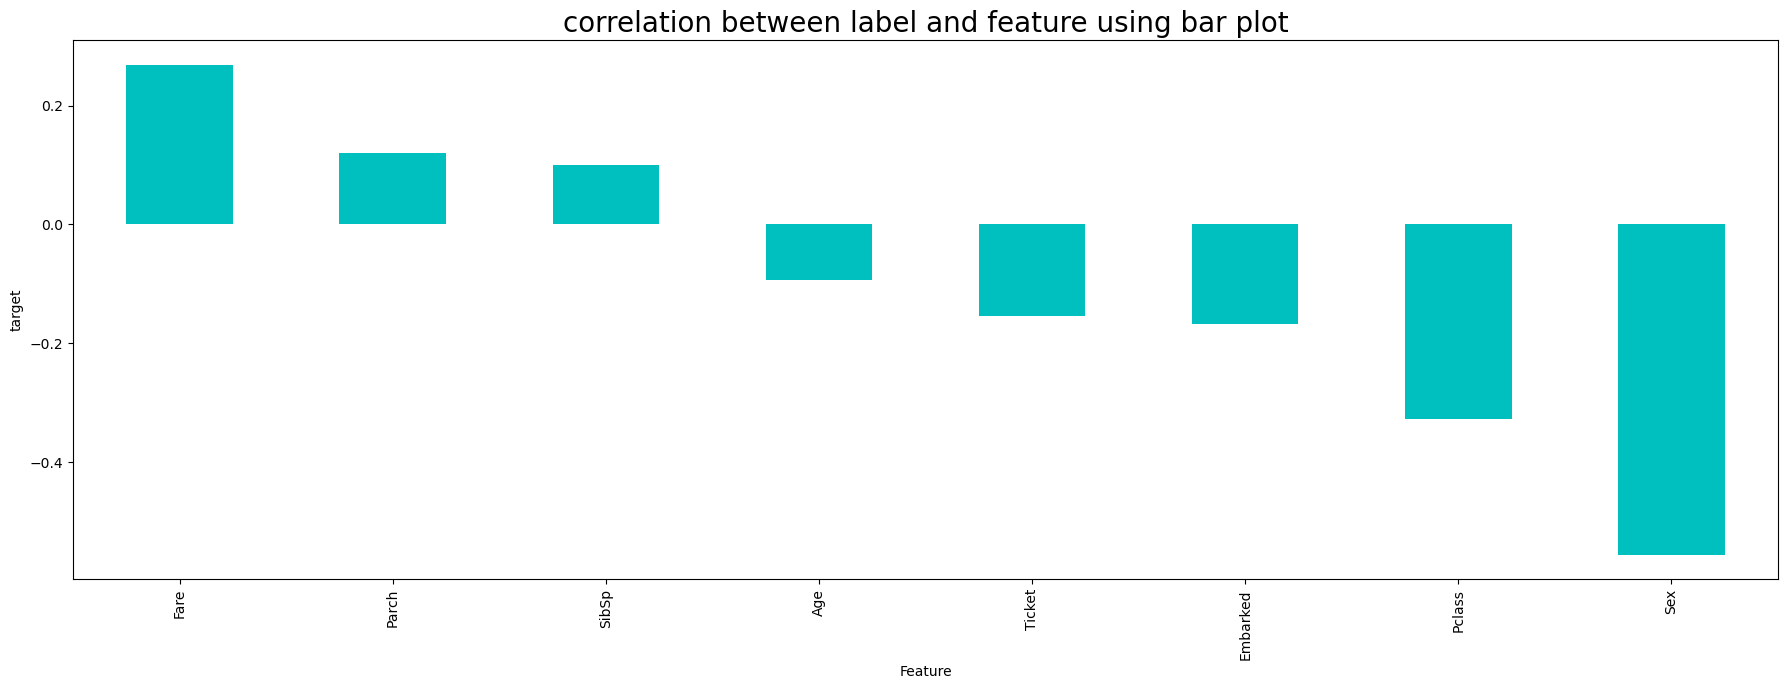

In [174]:
#Visualizing the correlation between label(y) and features using bar plot
plt.figure(figsize=(22,7))
new_df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

# Observation
    Positive Relation
        
        - Fare , Parch , Sibsp
    
    Negative Relation
       
       - Sex, Pclass, Embarked , Ticket , Age

# Model Building (Classification)

In [279]:
x = new_df.drop("Survived", axis=1)
y = new_df["Survived"]

In [280]:
x.shape

(859, 8)

In [281]:
y.shape

(859,)

In [282]:
y.value_counts()

0    521
1    338
Name: Survived, dtype: int64

In [283]:
from imblearn.over_sampling import SMOTE
# adding samples to make all the categorical quality values same
oversample = SMOTE()
x,y= oversample.fit_resample(x,y)


SMOTE is the over sampling mechanism that we are using to ensure that all the categories present in our target label have the same value.

In [284]:
y.value_counts()

0    521
1    521
Name: Survived, dtype: int64

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

In [285]:
#Lets check for skewness
data.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.327382
SibSp       3.695352
Parch       2.749117
Fare        4.787317
dtype: float64

Here i am going to set threshold for +/- 0.5.and "Age" Columns follow are Right Skewed Lets Use Some Technique  and made Normal Distribution , and  Only those data not come in our range which are encoded .

In [286]:
#Removing skewness using yeo_johnson method
skew = ["Fare"]
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''
x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,Fare
0,-0.923884
1,1.234439
2,-0.834455
3,0.980641
4,-0.818735


In [287]:
# Checking skewness after using yeo-johnson ethod
x.skew()

Pclass     -0.425335
Sex        -0.228283
Age         0.251634
SibSp       2.022255
Parch       3.193150
Ticket      0.071655
Fare       -0.052710
Embarked   -1.027348
dtype: float64

Now we can see that Our Data Almost be converted in Normal Distribution . Lets Move Foreward

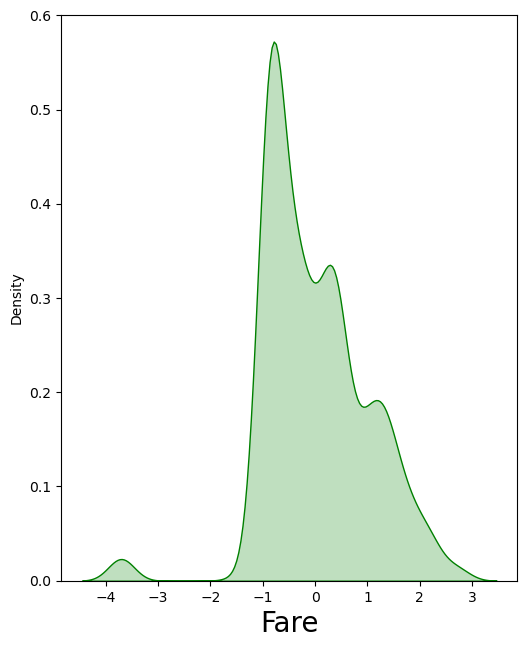

In [288]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Look Like a Normal Distribution

In [289]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0.917152,0.892497,-0.565214,1.081633,-0.427228,0.943255,-0.923884,0.655104
1,-1.416602,-1.120451,0.572824,1.081633,-0.427228,1.294201,1.234439,-1.769829
2,0.917152,-1.120451,-0.280705,-0.554160,-0.427228,1.650021,-0.834455,0.655104
3,-1.416602,-1.120451,0.359442,1.081633,-0.427228,-1.352514,0.980641,0.655104
4,0.917152,0.892497,0.359442,-0.554160,-0.427228,0.694669,-0.818735,0.655104


In [290]:
#Checking VIF values
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,2.520283,Pclass
1,1.140844,Sex
2,1.127336,Age
3,1.221431,SibSp
4,1.225881,Parch
5,1.129842,Ticket
6,2.681221,Fare
7,1.096907,Embarked


Here , We set threshol for +/- 5 . So all the data comes in our range . So we can say that here we dont have any multicollinearity problem..

In [291]:
#Lets use any other feature selection technique
from sklearn.feature_selection import SelectKBest,f_classif

select_feature=SelectKBest(score_func=f_classif,k=8)
fit=select_feature.fit(x,y)
score=pd.DataFrame(fit.scores_)
column=pd.DataFrame(x.columns)

best_feature=pd.concat([column,score],axis=1)
best_feature.columns=['Feature','Score']
print(best_feature.nlargest(8,'Score'))

    Feature       Score
1       Sex  617.773759
6      Fare  167.975265
0    Pclass  137.346818
7  Embarked   46.068932
5    Ticket   25.840130
2       Age    7.083078
4     Parch    5.729226
3     SibSp    1.871815


So, Here we can see that all the data contributing in model building so we dont go delete any columns here .

In [292]:
# For model prepration
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
dt=DecisionTreeClassifier()

In [293]:
#Lets make one fucntion to check accuracy again and again
def metrics_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        print("======================Training Score===================")
        print("Accuracy Score  ==> ",accuracy_score(y_train,y_pred))
    elif train==False:
        pred=clf.predict(x_test)
        print("======================Testing Score====================")
        print("Accuracy Score==>  ",accuracy_score(y_test,pred))
        print("Classification Report==> ",classification_report(y_test,pred))
        print("Confusion Matrix==> ",confusion_matrix(y_test,pred))
        cv_score = (cross_val_score(clf, x, y, cv=5).mean())*100
        print("Cross Validation Score:", cv_score)

In [235]:
# finding Best Random state
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    dt.fit(x_train,y_train)
    x_pred=dt.predict(x_train)
    y_pred=dt.predict(x_test)
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_train,x_pred)}")
    print(f" At random state {i} , the testing accuracy is :- {accuracy_score(y_test,y_pred)}")
    print(f" At random state {i} , the Classification  is :- {classification_report(y_test,y_pred)}")
    print(f" At random state {i} , the Confusion matrix is :- {confusion_matrix(y_test,y_pred)}")
    print("\n")

 At random state 0 , the testing accuracy is :- 0.9987995198079231
 At random state 0 , the testing accuracy is :- 0.8277511961722488
 At random state 0 , the Classification  is :-               precision    recall  f1-score   support

           0       0.82      0.82      0.82       101
           1       0.83      0.83      0.83       108

    accuracy                           0.83       209
   macro avg       0.83      0.83      0.83       209
weighted avg       0.83      0.83      0.83       209

 At random state 0 , the Confusion matrix is :- [[83 18]
 [18 90]]


 At random state 1 , the testing accuracy is :- 0.9987995198079231
 At random state 1 , the testing accuracy is :- 0.7942583732057417
 At random state 1 , the Classification  is :-               precision    recall  f1-score   support

           0       0.86      0.75      0.81       118
           1       0.73      0.85      0.78        91

    accuracy                           0.79       209
   macro avg       0.80 

Here , We select Random State 4 .

In [294]:
#Assigning in Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [295]:
#Lets Fit the data
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [296]:
metrics_score(dt,x_train,x_test,y_train,y_test,train=True)
metrics_score(dt,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  1.0
======================Testing Score====================
Accuracy Score==>   0.8133971291866029
Classification Report==>                precision    recall  f1-score   support

           0       0.78      0.86      0.82       101
           1       0.86      0.77      0.81       108

    accuracy                           0.81       209
   macro avg       0.82      0.81      0.81       209
weighted avg       0.82      0.81      0.81       209

Confusion Matrix==>  [[87 14]
 [25 83]]
Cross Validation Score: 78.127990430622


Here can see that our model is Overfitted Because if you see in the CV Score  it give like our testing data. and if you see in the test data .then you can find it give 100% accuracy . Lets go to treat with GridSearchCV

In [297]:
#Lets do Hyperparameter Tuning
grid_param={
    'criterion':['ginni','entropy'],
    'max_depth': range(10,15),# The Maximum depth of the tree
    'min_samples_leaf':range(2,6),#The maximum number of samples required to be at a leaf node
    'min_samples_split':range(3,8),#The minimum numbers of sample required to split an internal node
    'max_leaf_nodes':range(5,10)}#Best nodes are defined as them unlimited number of leaf nodes

#criterian
grid_search=GridSearchCV(estimator=dt,
                         param_grid=grid_param,
                         cv=5,
                        n_jobs=-1)#use all the cores in your system for performance improvement .

In [298]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['ginni', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [299]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 8, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [300]:
#Initiate DecisionTreeClassifier with new parameter and train.

cnn=DecisionTreeClassifier(criterion='entropy',max_depth=10,max_leaf_nodes=6,min_samples_split= 2,min_samples_leaf=2)

In [301]:
#Train the model
cnn.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=6,
                       min_samples_leaf=2)

In [302]:
#Call the function and pass dataset to check train and test score
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

======================Training Score===================
Accuracy Score  ==>  0.82953181272509
======================Testing Score====================
Accuracy Score==>   0.84688995215311
Classification Report==>                precision    recall  f1-score   support

           0       0.81      0.90      0.85       101
           1       0.90      0.80      0.84       108

    accuracy                           0.85       209
   macro avg       0.85      0.85      0.85       209
weighted avg       0.85      0.85      0.85       209

Confusion Matrix==>  [[91 10]
 [22 86]]
Cross Validation Score: 81.4814133235186


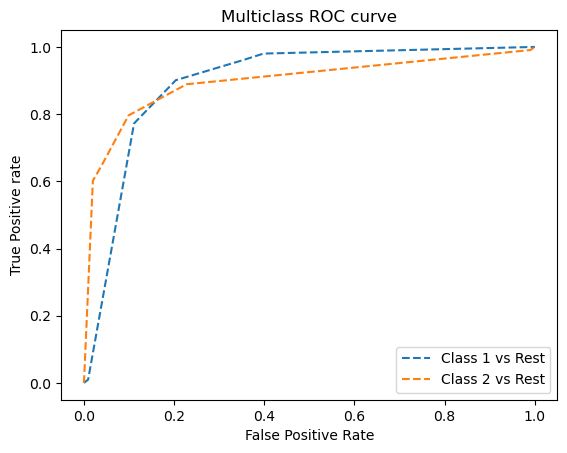

In [303]:
#Lets plot ROC Curve
from sklearn.metrics import roc_curve, auc
#predicting the data
y_pred_cnb = cnn.predict(x_test)
y_prob_pred_cnb = cnn.predict_proba(x_test)
# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--', label='Class 1 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--', label='Class 2 vs Rest')


plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()


In [304]:
import pickle
filename=('Pranathi Machine Learning (Decision Tree) Assignment 4.0')
pickle.dump(cnn,open(filename,'wb'))

# Conclusion

In [305]:
loaded_model=pickle.load(open('Pranathi Machine Learning (Decision Tree) Assignment 4.0','rb'))
result=cnn.score(x_test,y_test)
print(result*100)

84.688995215311


In [306]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
Predicted,1,0,0,0,1,0,0,1,1,0,...,1,0,1,1,0,0,0,0,1,0
Original,0,0,0,1,1,1,1,1,1,1,...,0,0,0,1,1,1,1,0,1,1


# Lets Build Regression Model

In [307]:
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,520,7.2500,2
1,1,1,0,38.0,1,0,592,71.2833,0
2,1,3,0,26.0,0,0,665,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,469,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.0000,2
887,1,1,0,19.0,0,0,14,30.0000,2
888,0,3,0,19.0,1,2,671,23.4500,2
889,1,1,1,26.0,0,0,8,30.0000,0


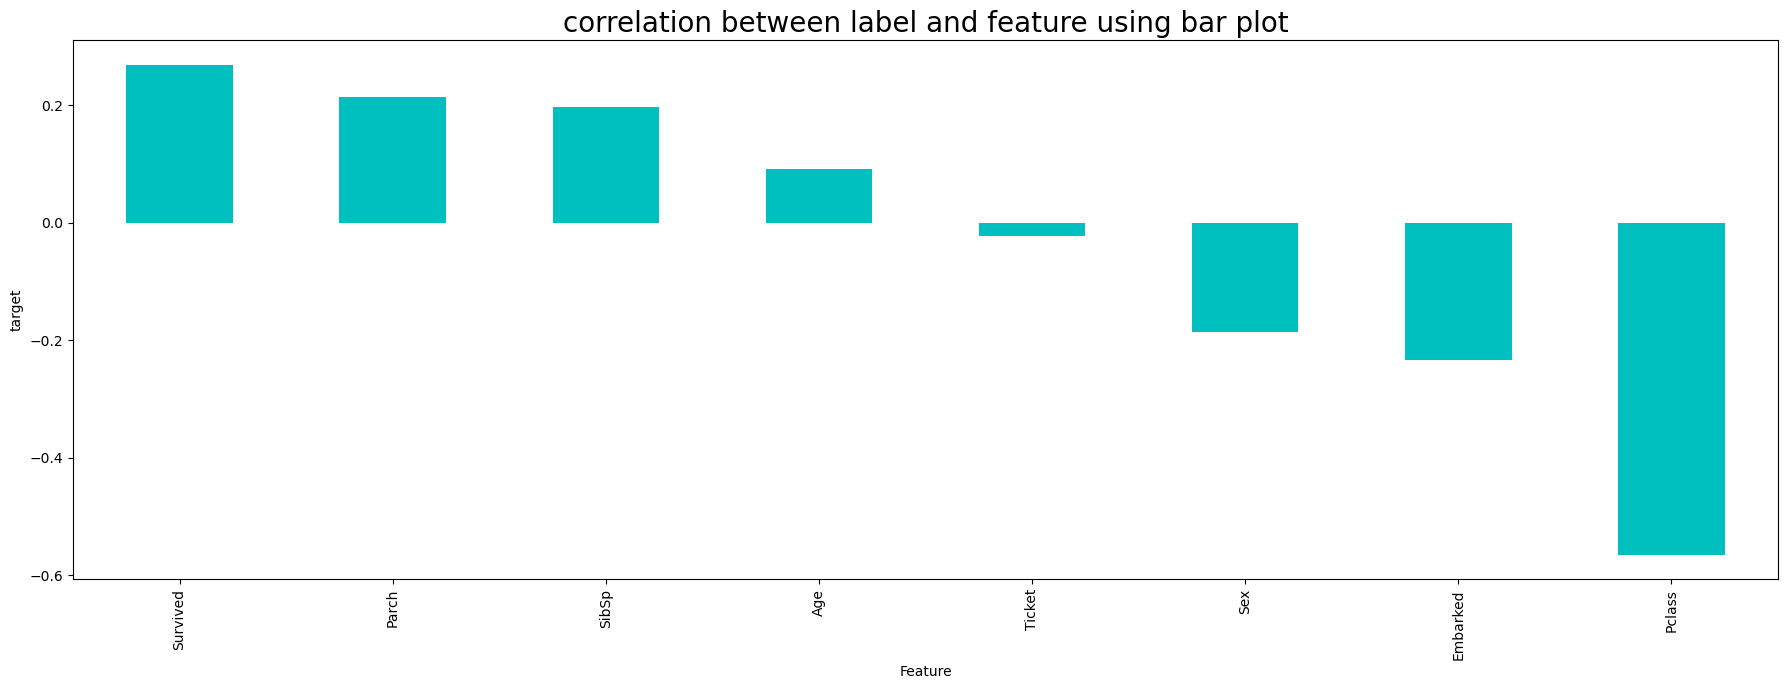

In [308]:
#Visualizing the correlation between label(y) and features using bar plot
plt.figure(figsize=(22,7))
new_df.corr()['Fare'].sort_values(ascending=False).drop(['Fare']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=10)
plt.ylabel('target',fontsize=10)
plt.title('correlation between label and feature using bar plot',fontsize=20)
plt.show()

# Observation

    Positive Relation
        
            -Survived,Parch,Sibsp,Age
            
  
    Negative Relation
            
            -Pclass,Embarked,Sex,Ticket

# Regression Model

In [383]:
x = new_df.drop("Fare", axis=1)
y = new_df["Fare"]

In [387]:
#Lets check for the shape of the x
x.shape

(859, 8)

In [388]:
#Lets check for the shape of the y
y.shape

(859,)

In [389]:
# Checking for skewness
x.skew()

Survived    0.436851
Pclass     -0.577318
Sex        -0.612139
Age         0.296092
SibSp       1.964046
Parch       3.134203
Ticket      0.025350
Embarked   -1.216948
dtype: float64

Here , We set threshold line for +/- 0.5 and all data points comes in our given range . except those who are categorical column.

In [391]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,-0.805452,0.851629,0.740100,-0.568898,0.994428,-0.433344,0.928845,0.596674
1,1.241539,-1.531267,-1.351169,0.563433,0.994428,-0.433344,1.287565,-1.897454
2,1.241539,0.851629,-1.351169,-0.285815,-0.570066,-0.433344,1.651267,0.596674
3,1.241539,-1.531267,-1.351169,0.351121,0.994428,-0.433344,-1.417781,0.596674
4,-0.805452,0.851629,0.740100,0.351121,-0.570066,-0.433344,0.674752,0.596674


In [392]:
#Checking VIF- Variance Inflation Factor values
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.666030,Survived
1,1.393718,Pclass
2,1.562475,Sex
3,1.162359,Age
4,1.149234,SibSp
5,1.161785,Parch
6,1.119472,Ticket
7,1.049773,Embarked


In VIF i am setting threshold for +/- 10 . and our all data points comes in our range . its means we dont any multicollinearity problem

In [395]:
#Lets use any other feature selection technique
from sklearn.feature_selection import SelectKBest,f_classif

select_feature=SelectKBest(score_func=f_classif,k=8)
fit=select_feature.fit(x,y)
score=pd.DataFrame(fit.scores_)
column=pd.DataFrame(x.columns)

best_feature=pd.concat([column,score],axis=1)
best_feature.columns=['Feature','Score']
print(best_feature.nlargest(8,'Score'))

    Feature       Score
1    Pclass  100.744672
7  Embarked   24.492250
6    Ticket   12.088904
5     Parch   12.086798
4     SibSp    6.245900
0  Survived    2.196623
2       Sex    1.884379
3       Age    1.855977


So, Here we can see that all the data contributing in model building so we dont go delete any columns here .

In [396]:
#Lets create with random forest
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [397]:
# finding Best Random state
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    dt = DecisionTreeRegressor()
    dt.fit(X_train, y_train)
    pred = dt.predict(X_test)
    r2 = r2_score(y_test, pred)
    
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i

print("Best r2 score is", maxAccu,"on Random State", maxRS)

Best r2 score is 0.9469042986453722 on Random State 832


In [398]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=832)

In [399]:
regressors = {
    
    'DecisionTreeRegressor()' : DecisionTreeRegressor(),
    
}

results=pd.DataFrame(columns=['MAE','MSE', 'RMSE', 'R2-score'])

for method,func in regressors.items():
    model = func.fit(X_train,y_train)
    pred = model.predict(X_test)
    results.loc[method]= [np.round(mean_absolute_error(y_test,pred),3),
                          np.round(mean_squared_error(y_test,pred),3),
                          np.sqrt(mean_squared_error(y_test,pred)),
                          np.round(r2_score(y_test,pred),3)
                          
                         ]
results

,MAE,MSE,RMSE,R2-score
DecisionTreeRegressor(),5.407,123.657,11.120096,0.96


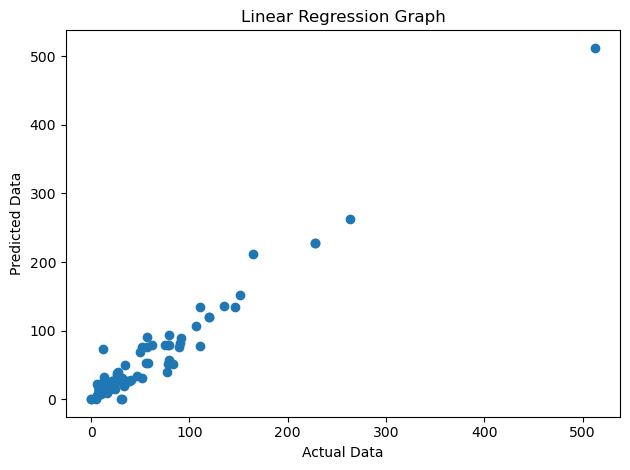

In [400]:
#Best Fit Line
plt.scatter(y_test,pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Linear Regression Graph')
plt.tight_layout()

In [401]:
#Cross - Validation of the mode
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
lss  = r2_score(y_test,y_pred)

In [402]:
# from sklearn.model_selection import cross_val_score
for j in range(2,10):
    isscore = cross_val_score(dt,x,y,cv=j)
    lsc = isscore.mean()
    print("At cv:-",j)
    print('Cross validation score is:-',lsc*100)
    print('accuracy_score is:-',lss*100)
    print('\n')

At cv:- 2
Cross validation score is:- 50.778585332412575
accuracy_score is:- 94.97967521006896


At cv:- 3
Cross validation score is:- 64.31268126112816
accuracy_score is:- 94.97967521006896


At cv:- 4
Cross validation score is:- 73.13031784715875
accuracy_score is:- 94.97967521006896


At cv:- 5
Cross validation score is:- 66.7895743705131
accuracy_score is:- 94.97967521006896


At cv:- 6
Cross validation score is:- 49.22485754120505
accuracy_score is:- 94.97967521006896


At cv:- 7
Cross validation score is:- 50.139425666278704
accuracy_score is:- 94.97967521006896


At cv:- 8
Cross validation score is:- 46.97852818541478
accuracy_score is:- 94.97967521006896


At cv:- 9
Cross validation score is:- 30.846866648959452
accuracy_score is:- 94.97967521006896




In [403]:
lsscore_selected = cross_val_score(dt,x,y,cv=4).mean()
print("The cv score is: ",lsscore_selected,"\nThe accuracy score is: ",lss)

The cv score is:  0.7349478787995439 
The accuracy score is:  0.9497967521006896


In [417]:
#We are tuning four important hyperparameter right now, we are passing the different values for both paramters.


grid_param={
    'max_depth': range(10,15),# The Maximum depth of the tree
    'min_samples_leaf':range(2,6),#The maximum number of samples required to be at a leaf node
    'min_samples_split':range(3,8),#The minimum numbers of sample required to split an internal node
    'max_leaf_nodes':range(5,10)}#Best nodes are defined as them unlimited number of leaf nodes

#criterian

In [418]:
grid_search=GridSearchCV(estimator=dt,
                         param_grid=grid_param,
                         cv=4,
                        n_jobs=-1)#use all the cores in your system for performance improvement .

In [419]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [420]:
best_parameter=grid_search.best_params_
print(best_parameter)

{'max_depth': 11, 'max_leaf_nodes': 9, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [425]:
#Initiate DecisionTreeClassifier with new parameter and train.

cnn=DecisionTreeRegressor(max_depth=11,max_leaf_nodes=9,min_samples_split= 3,min_samples_leaf=2)

In [427]:
#Train the model
cnn.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=11, max_leaf_nodes=9, min_samples_leaf=2,
                      min_samples_split=3)

In [428]:
cnn.score(X_train,y_train)

0.6982431105813656

In [429]:
cnn.score(X_test,y_test)

0.7984486643569086

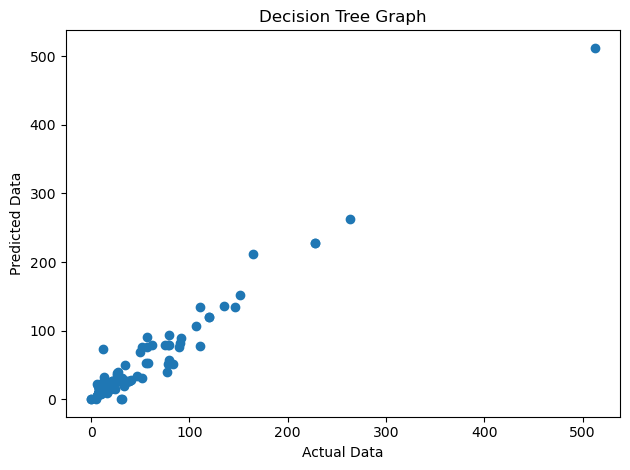

In [430]:
#Plot Best Fit Line
plt.scatter(y_test,pred)
plt.xlabel('Actual Data')
plt.ylabel('Predicted Data')
plt.title('Decision Tree Graph')
plt.tight_layout()

In [432]:
import pickle
filename=('Pranathi Linear Regression Project 4.0')
pickle.dump(cnn,open(filename,'wb'))

In [433]:
loaded_model=pickle.load(open('Pranathi Linear Regression Project 4.0','rb'))
result=loaded_model.score(X_test,y_test)
print(result*100)

79.84486643569086


In [434]:
conclusion=pd.DataFrame([loaded_model.predict(X_train)[:],pred[:]],index=['predicted','original'])

In [435]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,677,678,679,680,681,682,683,684,685,686
predicted,14.519628,14.519628,14.519628,42.038987,14.519628,14.519628,14.519628,14.519628,14.519628,14.519628,...,42.038987,14.519628,14.519628,82.169546,14.519628,14.519628,115.07685,14.519628,14.519628,14.519628
original,27.900000,120.000000,7.795800,39.000000,512.329200,13.000000,7.925000,227.525000,51.862500,27.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Intern at Pranathi
#Student of DataTrained - Saurav
#Date -> 10-April-2022
#Time -> 13:22